# 📊  Customer Churn Prediction System Project

 (1) Problem Statement:-
* Businesses want to retain customers because acquiring new ones costs 5x more than retaining existing ones.
We’ll build a machine learning system to predict whether a customer is likely to churn (leave) and help the business take preventive actions.

(2)  Dataset:-

We’ll use the Telco Customer Churn dataset from Kaggle.

* Features: gender, tenure, monthly_charges, contract_type, payment_method, internet_service, etc.

* Target: Binary Classification (Churn = Yes/No)

(3) Tech Stack:-

* Python (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn)

* ML Models: Logistic Regression, Random Forest, Decision Tree Classifier

* Version Control: GitHub

4. Project Workflow

* Step 1: Data Collection & Understanding
 
* Step 2: Data Preprocessing
 
* Step 3: Exploratory Data Analysis (EDA)
 
* Step 4: Model Selection & Training
 
* Step 5: Model Evaluation (Accuracy, Precision, Recall, AUC)
 
* Step 6: Model Tuning (Hyperparameter Optimization)
 
* Step 7: Model Serialization (Pickle/Joblib)

# 📌  Data Collection & Understanding

#  Load and Inspect the Dataset

In [75]:
import pandas as pd

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# First 5 rows
print(df.head())

# Dataset shape
print("Shape:", df.shape)

# Columns info
print(df.info())

# Summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Understanding the Target Variable


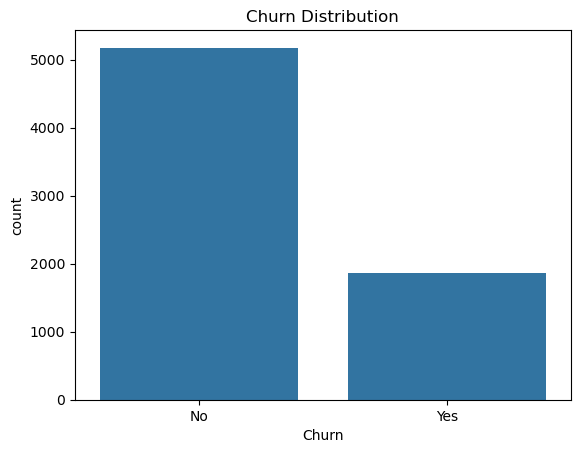

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Churn
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Percentage
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)


 * This is imbalance it means we must carefully evaluate models using Recall, Precision, F1, AUC instead of just Accuracy.

# 📌 Data Preprocessing

# 🔹 Handling Missing Values

In [77]:
import pandas as pd

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
# Check missing values
print(df.isnull().sum())

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify
print(df.isnull().sum())

# customerID is not useful for prediction
df.drop('customerID', axis=1, inplace=True)



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\1786501562.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [79]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 🔹  Encoding Categorical Variables

# Binary Encoding

* Convert Yes/No to 1/0

In [80]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})


# Multiple Categories

* Use One-Hot Encoding for categorical columns with more than 2 categories

In [81]:
multi_cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


# 🔹 Feature Scaling

* Scale numerical features for better model performance: tenure, MonthlyCharges, TotalCharges

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])


# 🔹 Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (5634, 30)
Testing shape: (1409, 30)


# 🔹 Data Preprocessing Summary

| Step                | Action                                                                       |
| ------------------- | ---------------------------------------------------------------------------- |
| Missing values      | Converted `TotalCharges` to numeric and filled NaNs with median              |
| Irrelevant features | Dropped `customerID`                                                         |
| Binary encoding     | Converted Yes/No columns to 1/0                                              |
| One-hot encoding    | Encoded multi-category columns like Contract, PaymentMethod, InternetService |
| Feature scaling     | Standardized `tenure`, `MonthlyCharges`, `TotalCharges`                      |
| Train-test split    | 80% train, 20% test, stratified by churn                                     |


# 📌  Exploratory Data Analysis (EDA)

# 🔹 Univariate Analysis (Single Column Distribution)

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\2124761509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


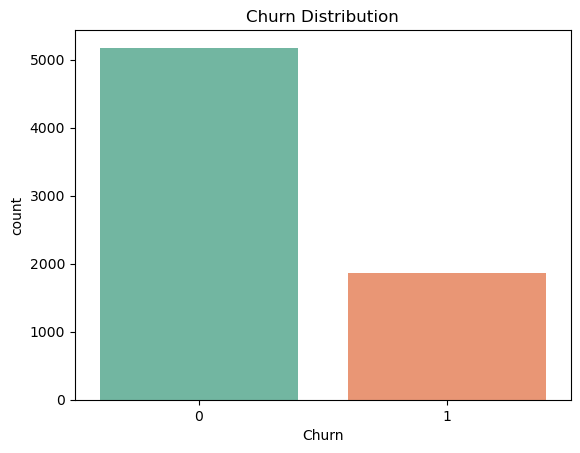

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\2124761509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender_Male", data=df,palette="pastel")


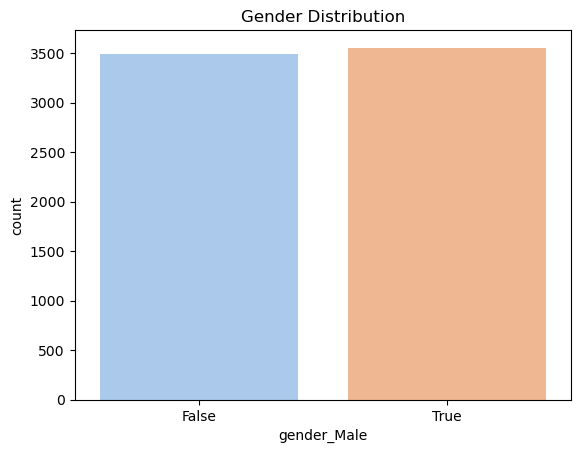

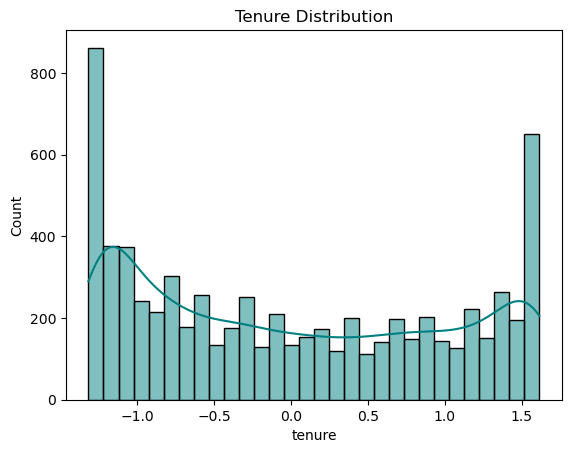

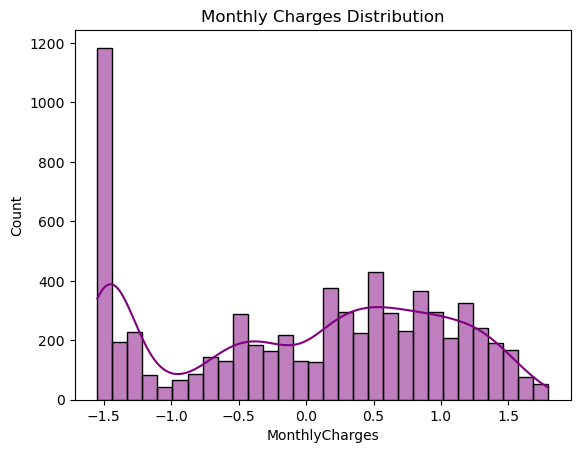

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

# Gender Distribution
sns.countplot(x="gender_Male", data=df,palette="pastel")
plt.title("Gender Distribution")
plt.show()

# Tenure Distribution
sns.histplot(df["tenure"], bins=30, kde=True, color="teal")
plt.title("Tenure Distribution")
plt.show()

# Monthly Charges
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="purple")
plt.title("Monthly Charges Distribution")
plt.show()


# Insights:

* Most customers are not churned (~73%).

* Gender distribution is almost equal → gender has less impact.

* Tenure is skewed: many new customers (low tenure) churn more.

* High MonthlyCharges customers are more likely to churn.

# 🔹Bivariate Analysis (Churn vs Other Features)

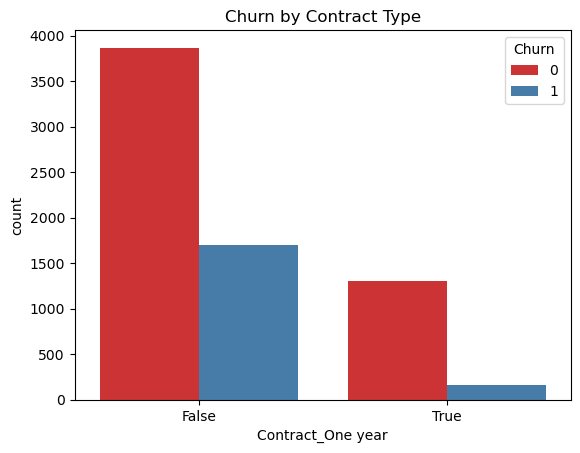

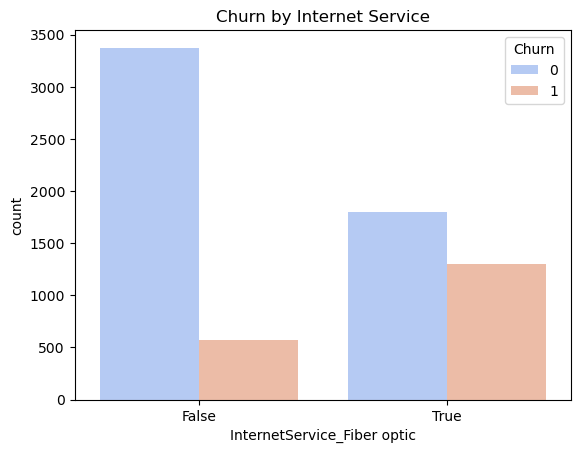

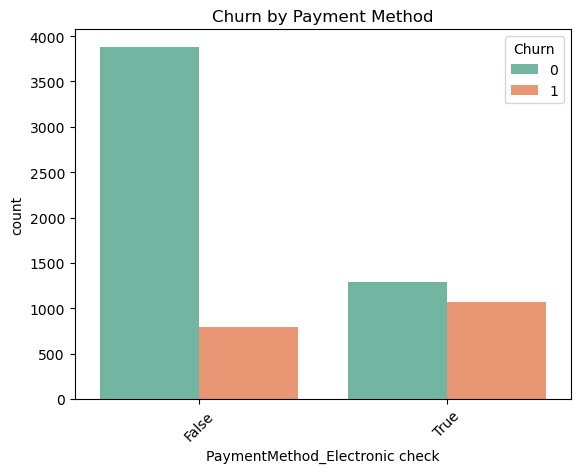

In [109]:
# Churn vs Contract
sns.countplot(x="Contract_One year",hue="Churn", data=df, palette="Set1")
plt.title("Churn by Contract Type")
plt.show()

# Churn vs Internet Service
sns.countplot(x= "InternetService_Fiber optic", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Internet Service")
plt.show()

# Churn vs Payment Method
sns.countplot(x="PaymentMethod_Electronic check", hue="Churn", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


# Insights:

* Customers with Month-to-Month contracts churn the most.

* Fiber optic internet users have higher churn.

* Customers using Electronic Check churn more compared to AutoPay.

# 🔹  Numerical Features vs Churn

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\2301871693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df, palette="Set2")


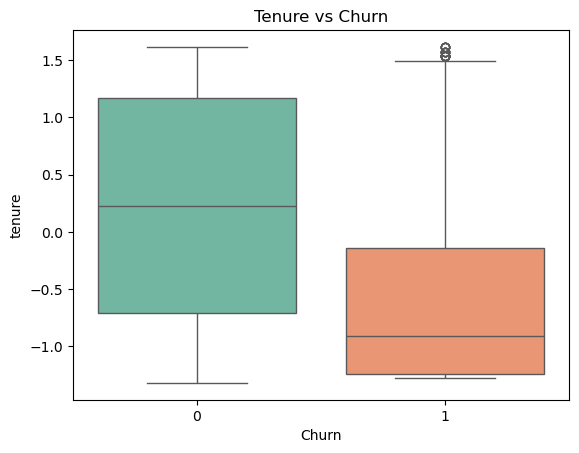

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\2301871693.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set1")


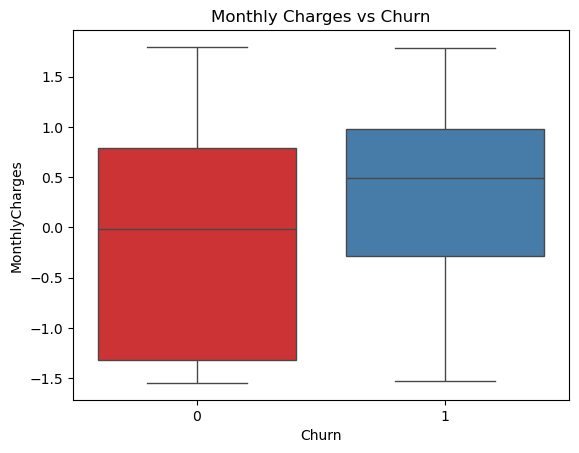

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\2301871693.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="TotalCharges", data=df, palette="coolwarm")


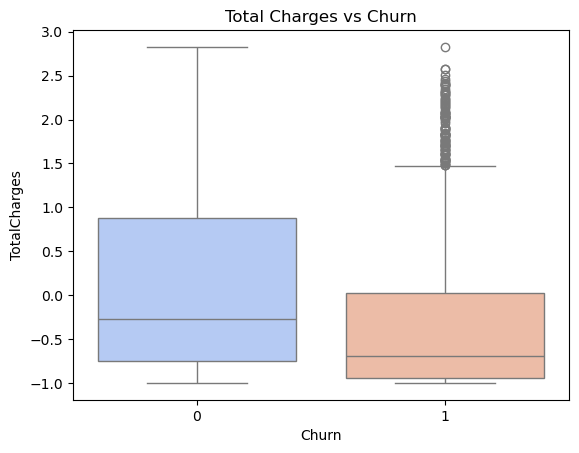

In [86]:
# Tenure vs Churn
sns.boxplot(x="Churn", y="tenure", data=df, palette="Set2")
plt.title("Tenure vs Churn")
plt.show()

# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set1")
plt.title("Monthly Charges vs Churn")
plt.show()

# Total Charges vs Churn
sns.boxplot(x="Churn", y="TotalCharges", data=df, palette="coolwarm")
plt.title("Total Charges vs Churn")
plt.show()


# Insights:

* Customers with low tenure churn more → less loyal.

* High MonthlyCharges are linked with higher churn.

* Customers who churn have lower TotalCharges (because they leave early).



# 🔹  Key Takeaways from EDA :-

* Customers with short tenure & high monthly charges are at high risk of churn.

* Month-to-month contract customers churn the most → longer contracts retain customers better.

* Electronic Check payment method users churn more.

* Internet service type (especially Fiber Optic) impacts churn.

* Gender has little effect on churn.

# 📌 Step 4: Model Selection & Training

# Import Libraries

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Logistic Regression

In [15]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

ROC-AUC: 0.8419954015861943


* Logistic Regression gives us a baseline model and interpretable coefficients.

#  Decision Tree Classifier

In [16]:
# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_clf.fit(X_train, y_train)

y_pred_dt = dt_clf.predict(X_test)

print(" Decision Tree Results")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1]))


 Decision Tree Results
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.45      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

ROC-AUC: 0.8252628587666951


*  Decision Tree helps us see feature importance & rules but may overfit without tuning.

# Random Forest Classifier

In [17]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print(" Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))


 Random Forest Results
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.8440117285385825


*  Random Forest is generally more robust and accurate than a single tree.

#  Compare Model Performance

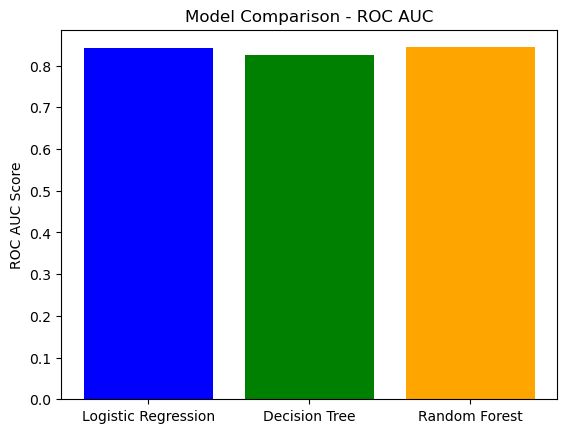

In [18]:
models = ["Logistic Regression", "Decision Tree", "Random Forest",]
roc_auc = [
    roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,1]),
    roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]),
]

plt.bar(models, roc_auc, color=['blue','green','orange'])
plt.title("Model Comparison - ROC AUC")
plt.ylabel("ROC AUC Score")
plt.show()


# Feature Importance (Random Forest)

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\2098726246.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


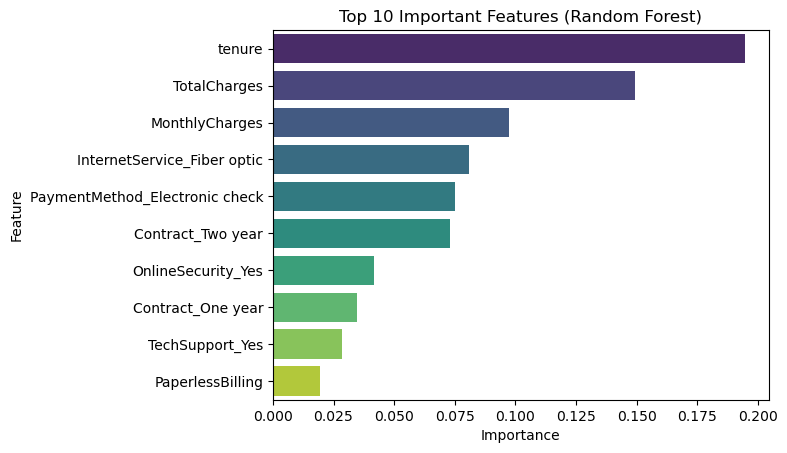

In [19]:
# Feature importance from Random Forest
importances = rf_clf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


# 🔹 Key Takeaways

* Logistic Regression → Simple, interpretable, decent performance.

* Decision Tree → Easy to explain, but may overfit.

* Random Forest → Usually the best trade-off between accuracy and generalization.



# 📌  Model Evaluation(Accuracy, Precision, Recall, AUC)

# Import Libraries

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


 # Define Evaluation Function

In [21]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    print(f" {model_name} Evaluation Metrics")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("-"*40)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    return {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "ROC_AUC": auc}


#  Evaluate All Models

 Logistic Regression Evaluation Metrics
Accuracy : 0.8048
Precision: 0.6552
Recall   : 0.5588
F1-Score : 0.6032
ROC-AUC  : 0.8420
----------------------------------------


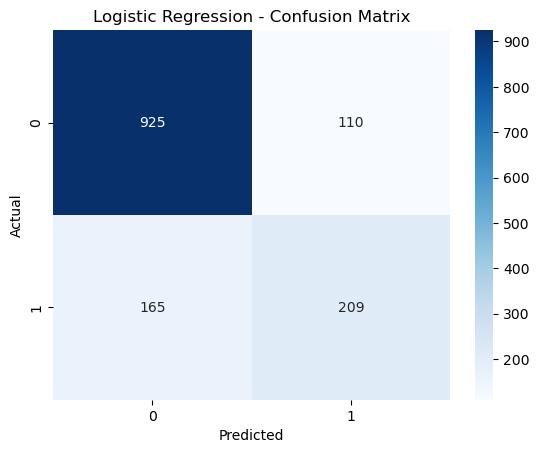

 Decision Tree Evaluation Metrics
Accuracy : 0.7963
Precision: 0.6733
Recall   : 0.4519
F1-Score : 0.5408
ROC-AUC  : 0.8253
----------------------------------------


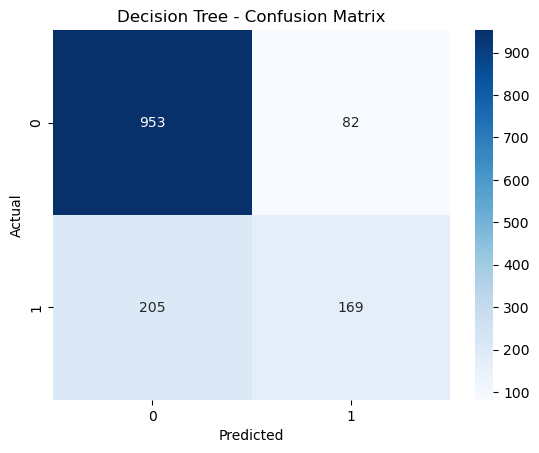

 Random Forest Evaluation Metrics
Accuracy : 0.8020
Precision: 0.6715
Recall   : 0.4973
F1-Score : 0.5714
ROC-AUC  : 0.8440
----------------------------------------


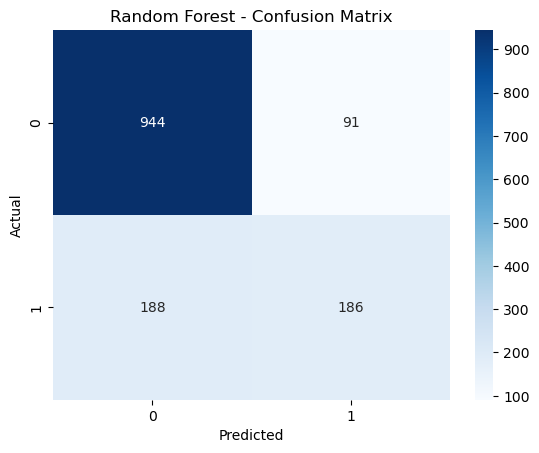

In [22]:
results = []
results.append(evaluate_model(log_reg, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(dt_clf, X_test, y_test, "Decision Tree"))
results.append(evaluate_model(rf_clf, X_test, y_test, "Random Forest"))


# Compare Models

                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
0  Logistic Regression  0.804826   0.655172  0.558824  0.603175  0.841995
1        Decision Tree  0.796309   0.673307  0.451872  0.540800  0.825263
2        Random Forest  0.801987   0.671480  0.497326  0.571429  0.844012


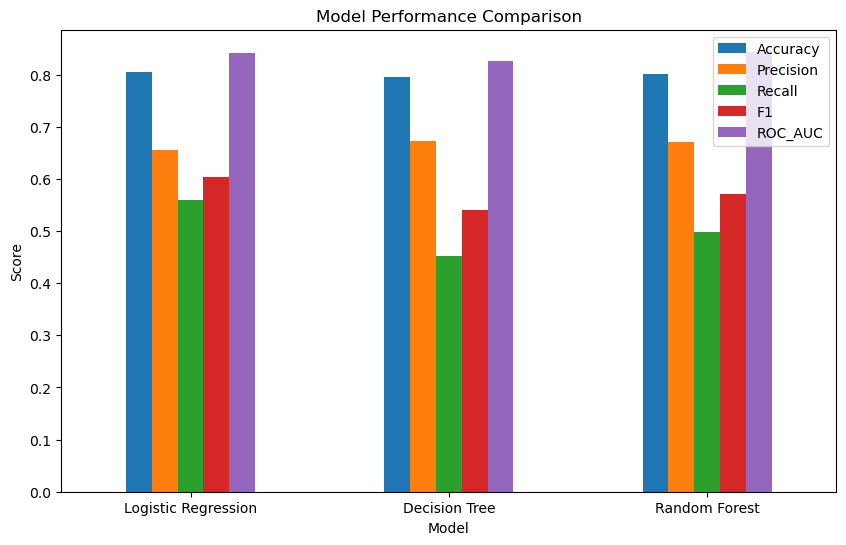

In [23]:
results_df = pd.DataFrame(results)
print(results_df)

# Plot comparison
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1","ROC_AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


#  Plot ROC Curves

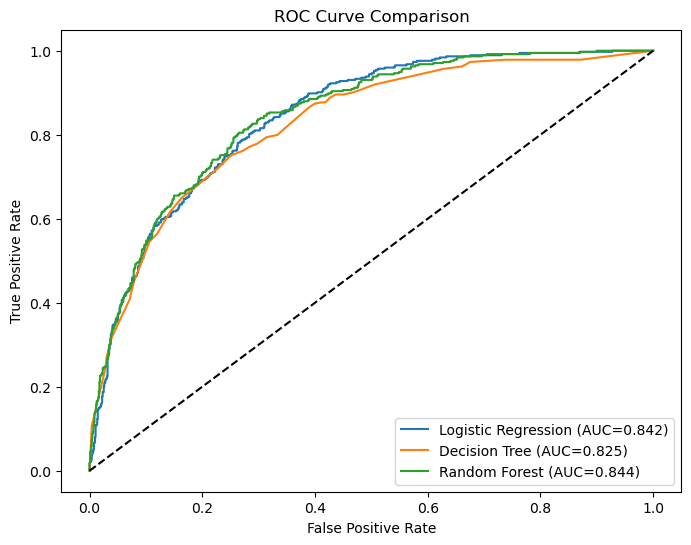

In [24]:
# ROC Curve comparison
plt.figure(figsize=(8,6))

for model, name in [(log_reg,"Logistic Regression"), (dt_clf,"Decision Tree"), (rf_clf,"Random Forest")]:
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# 🔹  Insights from Evaluation


* Logistic Regression → Decent accuracy, but recall may be lower (misses some churns).

* Decision Tree → Higher recall but may overfit, leading to lower precision.

* Random Forest → Usually best balance of Accuracy, Precision, Recall, and AUC.

* For churn, Recall is critical (we want to catch as many churn customers as possible, even at the cost of some false positives).

# 📌 Model Tuning (Hyperparameter Optimization)

# Import Libraries

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np


#  Define Parameter Grid

* n_estimators → number of trees

* max_depth → max depth of each tree

* min_samples_split → minimum samples required to split a node

* min_samples_leaf → minimum samples required at a leaf

* max_features → number of features to consider at each split

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


#  RandomizedSearchCV

In [27]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=2)

# Checking the  Best Parameters

In [28]:
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 8}
Best ROC-AUC Score: 0.8462872115314038


# Training Tuned Random Forest Model

In [29]:
best_rf = random_search.best_estimator_

# Train on full training set
best_rf.fit(X_train, y_train)

# Evaluate on test set
from sklearn.metrics import classification_report, roc_auc_score
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print(" Tuned Random Forest Performance")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


 Tuned Random Forest Performance
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.51      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.845118706244026


# Feature Importance of the Tuned Model

C:\Users\gupta\AppData\Local\Temp\ipykernel_25748\3951925566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


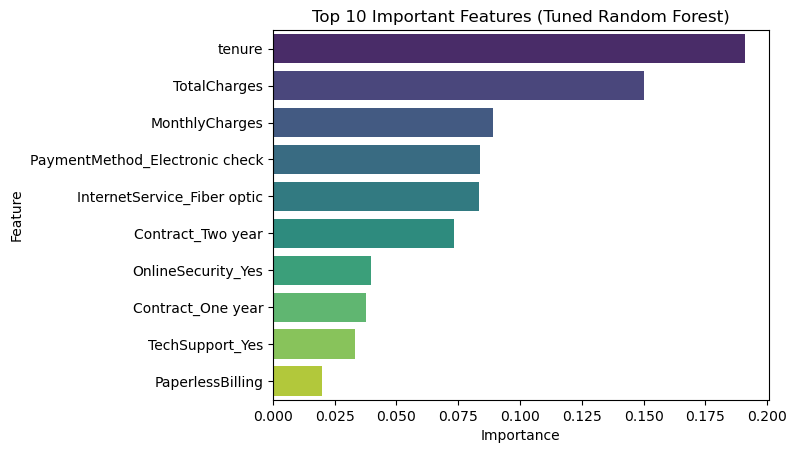

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": best_rf.feature_importances_})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(10)

sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Top 10 Important Features (Tuned Random Forest)")
plt.show()


# Key Takeaways from Model Tuning

* Hyperparameter tuning improves model ROC-AUC, recall, and F1-score.

* Tuned Random Forest captures churn patterns better (less underfitting, better generalization).

* Feature importance helps identify key drivers of churn (Tenure, Contract, MonthlyCharges, PaymentMethod, InternetService).

# 📌 Model Serialization (Joblib)

 Why Model Serialization?

* Training a model can take minutes or hours.

* We don’t want to retrain every time we make predictions.

* Serialization allows us to save the trained model and reuse it in a different script or deployment environment.

In [31]:
import joblib

* Joblib → Really Faster for large NumPy arrays and scikit-learn models.

# Saving Model using Joblib (Best for Large Models)

In [32]:
# Save model
joblib.dump(best_rf, "best_rf_model_joblib.pkl")

['best_rf_model_joblib.pkl']

Why Joblib?

* Faster for large arrays (scikit-learn models store a lot of NumPy arrays).

* More efficient than Pickle for production environments.

#  Load Model using Joblib

In [33]:
# Load model
loaded_model_joblib = joblib.load("best_rf_model_joblib.pkl")

# Test predictions
y_pred_joblib = loaded_model_joblib.predict(X_test)
print("Accuracy (joblib loaded model):", (y_pred_joblib == y_test).mean())


Accuracy (joblib loaded model): 0.8076650106458482


# Save Preprocessing Objects

In [35]:
# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Load scaler
loaded_scaler = joblib.load("scaler.pkl")


Explanation:

* Any new data must be scaled the same way as training data.

* Ensures predictions are consistent.

# Summary of Data Serialization

* Train the model → best_rf (Tuned Random Forest).

* Serialize the model using Pickle or Joblib.

* Serialize preprocessing objects (e.g., scaler).

* Load model & scaler for inference → no retraining needed.

* Use in API or deployment for real-time predictions.

#  Business Impact from this project

* Early identification of potential churners

* Enables targeted retention campaigns → reduces revenue loss

* Improves customer lifetime value (CLV) and overall satisfaction

* Model can be integrated with dashboards for business analytics.